## Import Packages and Enviroment Variable

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
DATA_PATH = "data/"
DIR_PATH = os.getcwd()
TRAIN_DATA_PATH = os.path.join(DIR_PATH, DATA_PATH, "train.csv")
TEST_DATA_PATH = os.path.join(DIR_PATH, DATA_PATH, "test.csv")

## Load Data and Basic EDA

In [3]:
train = pd.read_csv(TRAIN_DATA_PATH)
train.head()

,review,sentiment
0,the single worst film i've ever seen in a thea...,negative
1,I was actually around 13 years old camping nea...,positive
2,A small town is attacked by a horde of bloodth...,negative
3,I think the problem with this show not getting...,positive
4,"Wow, this movie was horrible. As a Bills fan I...",negative


In [4]:
train.shape

(40000, 2)

In [5]:
train.duplicated().sum()

np.int64(328)

In [6]:
train['sentiment'].value_counts(normalize=True)

sentiment
negative    0.500325
positive    0.499675
Name: proportion, dtype: float64

## Feature Engineering

In [7]:
train["word_count"] = train["review"].apply(lambda x: len(x.split()))
train["word_count"].head()

0    269
1    152
2    209
3    169
4     49
Name: word_count, dtype: int64

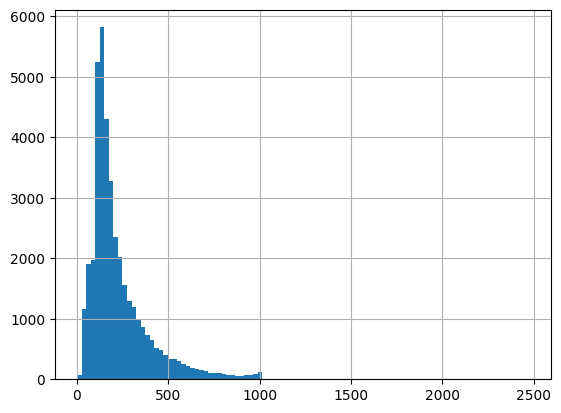

In [8]:
plt.show(train["word_count"].hist(bins=100))

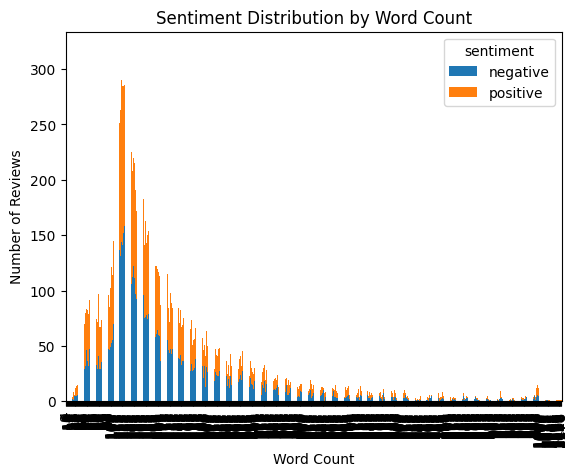

In [9]:
groups = train.groupby(['word_count','sentiment']).size().unstack(fill_value=0)
groups.plot(kind="bar", stacked=True)
plt.title("Sentiment Distribution by Word Count")
plt.xlabel("Word Count")
plt.ylabel("Number of Reviews")
plt.show()